X= [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Y1= [ 25  36  49  64  81 100 121 144 169 196 225 256 289 324 361 400 441 484
 529 576 625 676 729]
Iteration 1: Cost 135530.5561, Weight 		1.1573140000000002, Bias 0.06973800000000001
Iteration 2: Cost 124555.50209019461, Weight 		2.1694311048, Bias 0.126715036
Iteration 3: Cost 114498.92368543262, Weight 		3.13828388064192, Bias 0.18104917212032
Iteration 4: Cost 105283.95425219694, Weight 		4.065722259479061, Bias 0.23285342419622695
Iteration 5: Cost 96840.16007629903, Weight 		4.953517072322343, Bias 0.28223597563674213
Iteration 6: Cost 89103.00199598019, Weight 		5.803363431504756, Bias 0.3293003840535767
Iteration 7: Cost 82013.342090594, Weight 		6.616883968324115, Bias 0.37414577905485363
Iteration 8: Cost 75516.991654197, Weight 		7.395631932247965, Bias 0.41686705158139997
Iteration 9: Cost 69564.29699893994, Weight 		8.14109415760009, Bias 0.457555035147239
Iteration 10: Cost 64109.759922308054, Weigh

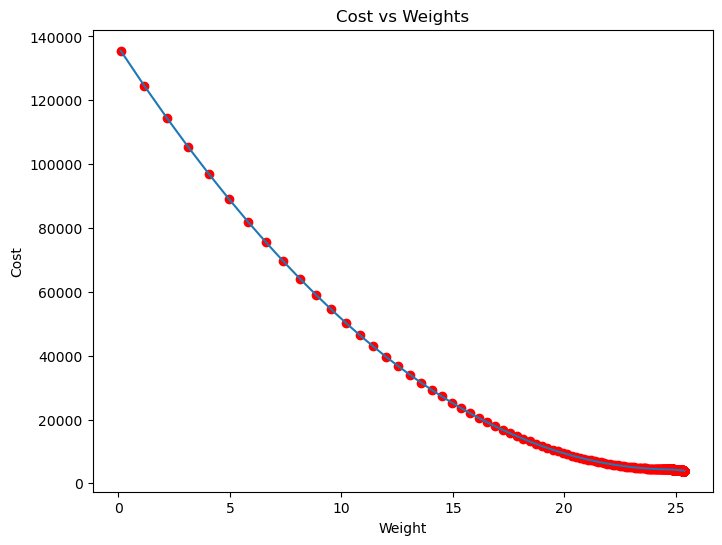

Estimated Weight: 25.38783964624477
Estimated Bias: -7.766974074210518


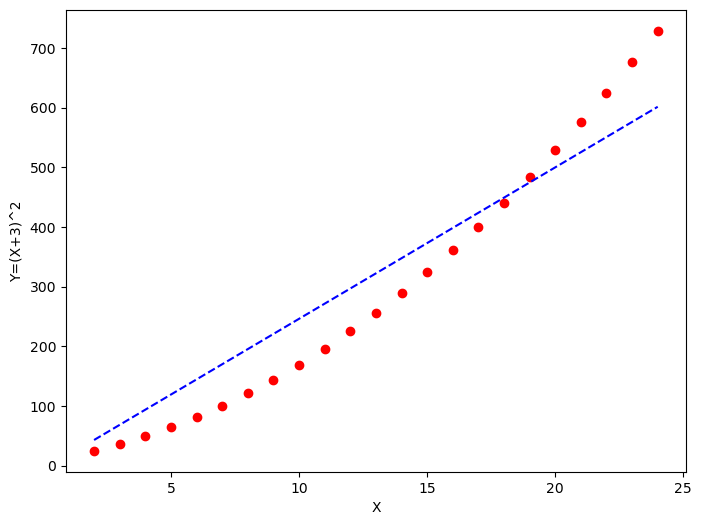

In [1]:
# -*- coding: utf-8 -*-

# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
	
	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
					stopping_threshold = 1e-6):
	
	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Estimation of optimal parameters
	for i in range(iterations):
		
		# Making predictions
		y_predicted = (current_weight * x) + current_bias
		
		# Calculationg the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)
		
		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)
		
		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)
				
		# Printing the parameters for each 1000th iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")
	
	
	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()
	
	return current_weight, current_bias


def main():
	
    # Importing the dataset
    dataset = pd.read_csv('Gradient_dataset.csv')
    X = dataset.iloc[:, 0].values
    Y = dataset.iloc[:, 1].values
    print("X=",X)
    print("Y1=",Y)
    
	# Estimating weight and bias using gradient descent
    estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")

	# Making predictions using estimated parameters
    Y_pred = estimated_weight*X + eatimated_bias
    
    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
			markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y=(X+3)^2")
    plt.show()

	
if __name__=="__main__":
	main()